<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to Descriptive Statistics with `numpy`


---

### Learning Objectives
*After this lesson, you will be able to:*
- Understand the measures of central tendency (mean, median, and mode).
- Understand how mean, median and mode are affected by skewness in data.
- Understand measures of dispersion (variance and standard deviation).

---

### Lesson Guide

- [Warm-Up on List & Dictionary Comprehensions](#warm-up)
- [Descriptive Statistics vs. Inferential Statistics](#descriptive_stats)
- [Measures of Central Tendency](#central_tendency)
- [Skewness](#skewness)
- [Measures of Dispersion](#dispersion)

<a id='warm-up'></a>

### Warm-Up on List & Dictionary Comprehensions

---

You have four minutes to try the questions below on list comprehensions and dictionary comprehensions.

#### Warm-Up A: Write a list comprehension that will take each non-zero number in `lstA` below, subtract 3, and square the result. 

In [1]:
lstA = [3,8,2,0,5,10,0]

In [2]:
[(n-3)**2 for n in lstA if n !=0]

[0, 25, 1, 4, 49]

#### Warm-Up B: Write a dictionary comprehension that will store the length of each of the words in `lstB`.  Each of the items in the dictionary should be in the form: `'BERLIN': 6`

In [3]:
lstB = ['Paris','london','ROME','Madrid','reykjavik']

In [4]:
{city.upper():len(city) for city in lstB}

{'PARIS': 5, 'LONDON': 6, 'ROME': 4, 'MADRID': 6, 'REYKJAVIK': 9}

<a id='descriptive_stats'></a>

### Descriptive Statistics

---

There are two main fields of statistics: **descriptive** and **inferential**.

- We use **descriptive** statistics to **make judgments** about the world based on **samples of data**. For example, how dependable is an observed difference between **groups**? 
- When we start covering **modeling and hypothesis testing**, our focus will shift to **inferential statistics**.

Right now, we're going to focus on descriptive statistics: **describing, summarizing, and understanding data**.

All variables have what is called a **distribution**. The distribution is the set of **all possible values** that a variable can take on, as well as **how frequently** it takes on each of these values. (One popular way to visualize the distribution of a variable is by using a histogram or bar chart).

=> The three questions that we want to answer about a distribution are:

- What is the center?
- What is the spread?
- What is the shape?



The first section of this lesson covers the **measures of central tendency**. Measures of central tendency provide descriptive information about the single numerical value that is considered to be the **"most typical" of the values of a quantitative variable**.
You're probably already familiar with some measures of central tendency: The **mean, median,** and **mode**.

We'll also discuss **skewness**, which is the lack of symmetry in a distribution of data that affects the mean, median, and mode.

Lastly, we'll take a look at **measures of dispersion** or variability in our data, namely the **range, variance**, and **standard deviation**.


<a id='central_tendency'></a>

### Measures of Central Tendency: Mean, Median, Mode

---

We'll be using three datasets here: 
- the average monthly sunshine hours for each month of the year for London
- the same data as above for New York City
- the average daily high temperature in July for 7 cities (London, New York, Rome, Chicago, Berlin, Madrid, Paris)

In [5]:
ldn_sun = [61.5,77.9,114.6,168.7,198.5,204.3,212.0,204.7,149.3,116.5,72.6,52.0]
nyc_sun = [162.7,163.1,212.5,225.6,256.6,257.3,268.2,268.2,219.3,211.2,151.0,139.0]
july_temps = [23.5,28.9,30.3,28.9,25.0,32.1,25.2]

In [6]:
import numpy as np

#### Mean

The mean is the sum of the numbers in a list, divided by the length of that list.

In [7]:
#Find the mean of the ldn_sun data without using numpy: 
sum(ldn_sun)/len(ldn_sun)

136.04999999999998

In [8]:
#Find the mean of the nyc_sun data using np.mean():
np.mean(nyc_sun)

211.22500000000002

#### Median

For **odd-length vectors**: The median is the middle number of the ordered list.

For **even-length vectors**: The median is the average of the two middle-most numbers of the ordered list.

The position of the median will be given by (n + 1)/2 with n being the number of numbers
- if the answer is an integer, like 9, then the median is the 9th number
- if the answer is a decimal, like 12.5, then the median is the mean of the 12th and 13th numbers

In [9]:
#find the median of the july_temps list without using numpy:
# sort the list
sorted_temps = july_temps
median_pos = int((len(sorted_temps)+1)/2)

In [10]:
print(sorted_temps)
print(f"median is {sorted_temps[median_pos]}")

[23.5, 28.9, 30.3, 28.9, 25.0, 32.1, 25.2]
median is 25.0


In [11]:
#find the median of the ldn_sun list without using numpy:
np.median(ldn_sun)

132.9

In [12]:
# check median of july_temps
np.median(july_temps)

28.9

In [13]:
#find the median of the nyc_sun list using np.median():


#### Mode

**The mode is the most frequently occurring number.**

Finding the mode is not as straightforward as the mean or median, so let's walk through how to calculate it using `scipy.stats.mode()`. 

Note: Finding the mode without `scipy.stats.mode()` is a challenge problem in this lesson's independent practice section.

In [14]:
#notice the type of result that we get when we use stats.mode
from scipy import stats
sample = [0,1,1,2,2,2,2,3,3,4,4,4,5]

          
stats.mode(sample)

ModeResult(mode=array([2]), count=array([4]))

In [15]:
# Mode Result shows the mode and the count of the mode. 
# If there is more than one mode, only one is returned. 
stats.mode(sample)[0][0]

2

In [16]:
#find the mode of the july_temps list using stats.mode()
stats.mode(july_temps)[0][0]

28.9

#### Once again, with `scipy`

Thankfully, we have a library that is easy to use and computationally optimized in `scipy` that can help us do the heavy lifting.  When possible it's best to use functions in `scipy` and `numpy`, since they are robust and fast. 

Using `scipy` and `numpy`, find the mean, median, and mode of the distribution `sample` below.

In [17]:
# Import Python modules here
from scipy import stats
import numpy as np


sample = [3, 75, 98, 2, 10, 3, 14, 99, 44, 25, 31, 100, 356, 4, 23, 55, 327, 64, 6, 20]

# Your solution here:
print(f"mean is {np.mean(sample)}")
print(f"median is {np.median(sample)}")
print(f"mode is {stats.mode(sample)[0][0]}")
print(f"mode count is {stats.mode(sample)[1][0]}")


mean is 67.95
median is 28.0
mode is 3
mode count is 2


In [18]:
# Your answers should be:   
# Mean: 67.95, Median: 28.0, Mode: 3.000000, Mode Count: 2

#### Pair discussion:

Come up with examples of when the mean may be slightly misleading in describing a dataset.

Do the same for mode and median.

<a id='skewness'></a>

### Skewness

---

Skewness refers to the **lack of symmetry** in a distribution of data.

[Technical note: we will be talking about skewness here only in the context of _unimodal_ distributions.]

![](assets/images/skewness.png)

**A *positive-skewed* distribution is one whose right tail is longer or fatter than its left. **

Conversely, **a *negative-skewed* distribution is one whose left tail is longer or fatter than its right**.


Symmetric distributions have no skewness!


#### Skewness and measures of central tendency

The mean, median, and mode are affected by skewness.

When a distribution is symmetric, the mean, median, and mode are the same.

> Symmetric: **mean == median == mode**

When a distribution is negatively skewed, the mean is less than the median, which is less than the mode.

> Negative skew: **mean < median < mode**

When a distribution is positively skewed, the mean is greater than the median, which is greater than the mode.

> Positive skew: **mode < median < mean**


Does the list of numbers below form a symmetric distribution? Is it skewed left of right?

In [19]:
# This is our sample
sample = [3, 75, 98, 2, 10, 3, 14, 99, 44, 25, 31, 100, 356, 4, 23, 10, 55, 327, 64, 6, 20]

In [20]:
#find the mean, median, and mode for the distribution, and use these to determine the skew:
s_mean = np.mean(sample)
s_median = np.median(sample)
s_mode = stats.mode(sample)[0][0]

print(f"mean is {s_mean}, median is {s_median}, mode is {s_mode}")

if (s_mean == s_median == s_mode):
    print("symmetric")
elif (s_mean<s_median < s_mode):
    print("negatively skewed")
elif (s_mean > s_median > s_mode):
    print("positively skewed")
else:
    print("undetermined")


mean is 65.19047619047619, median is 25.0, mode is 3
positively skewed


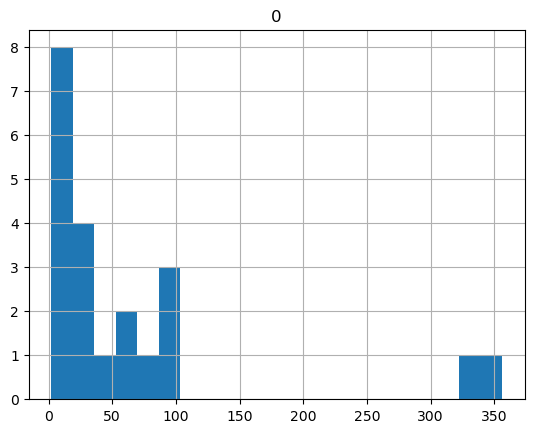

In [21]:
# We can code a quick example to plot this distribution:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(sample)

%matplotlib inline

df.hist(bins=len(sample))
plt.show()

<a id='dispersion'></a>

### Measures of Dispersion

---

Measures of dispersion including the **range**, **variance**, and **standard deviation** tell you about the **spread of your data**.

These measurements give complementary information to the measures of **central tendency** and are no less important.


#### Range

The range is the space between the **lowest and highest values of a distribution**. Because this metric only depends on two observations, it's a simple calculation. Range shows how widely the numbers in a set vary.

To calculate the range:

1. Sort the `sample` object in ascending order.
- Subtract the first item from the last item.
- Compare your result with `numpy`'s `ptp()` method, which accomplishes the same task.


In [22]:
sample = [3, 75, 98, 2, 10, 3, 14, 99, 44, 25, 31, 100, 356, 4, 23, 55, 327, 64, 6, 20]

# Find range with max() and min():
print(f"Max is {max(sample)}")
print(f"Min is {min(sample)}")
print(f"Range is {max(sample) - min(sample)}")
# Find range with np.ptp():

print(f"Using np.ptp, range is {np.ptp(sample)}")

Max is 356
Min is 2
Range is 354
Using np.ptp, range is 354


#### Variance

The variance is a numeric value used to describe the **degree of spread** in a distribution of the numbers.

Variance is calculated by:
- subtracting each value from the mean
- squaring this difference
- finding the average of these differences (ie finding the sum, then dividing by n)

In Python variance can be calculated with:
```python
variance = []
n_mean = np.mean(numbers)

for num in numbers:
  variance.append((num - n_mean) ** 2)

variance = np.sum(variance)
variance = variance / len(numbers)
```


Using `numpy` the variance is simply:
```python
variance = np.var(n)

print(variance)
9414.6475
```



#### Standard deviation

The **standard deviation** (often written lowercase sigma: σ) is the **square root of the variance**.

In other words, for a random variable X, 

```Latex
var(X) = σ^2(X)
```
Because the **variance** is the **average of the distances from the mean _squared_**, the standard deviation tells us approximately, on average, the **distance of numbers in a distribution from the mean of the distribution**.

The standard deviation can be calculated like so:
```python
std = np.std(n)

print(std)
97.029106457804716
```

![](assets/images/dist_with_var_std.png)


In [23]:
# get a random sample from a random variable following a normal distribution with a mean of 5 and a variance of 12
X = np.random.normal(0,15,1000)


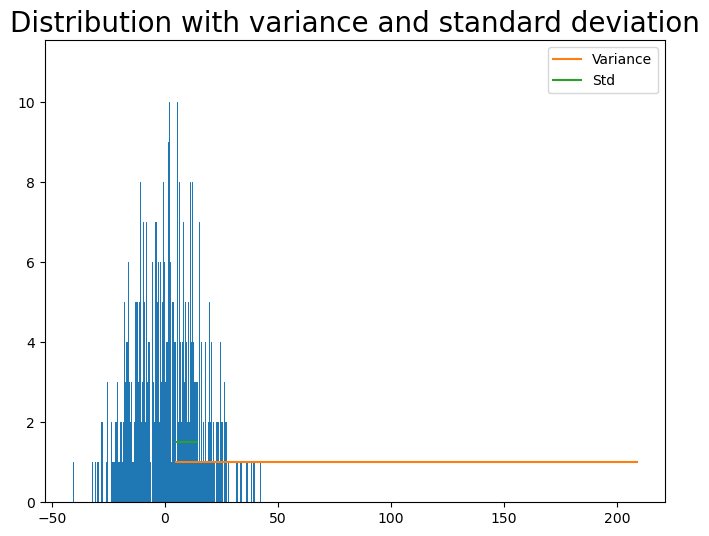

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(X, bins=round(len(X)/2))
ax.plot(np.linspace(5, np.var(X), num=50), np.ones(50), label="Variance")
ax.plot(np.linspace(5, (np.var(X))**(1/2), num=20),
        1.5*np.ones(20), label="Std")

ax.legend()
ax.set_title('Distribution with variance and standard deviation', fontsize=20)
plt.show()

In [25]:
#find the variance for ldn_sun
variance = np.var(ldn_sun)
print(f"variance is {variance}")

variance is 3429.3841666666663


In [26]:
#find the standard deviation for ldn_sun
print(f"standard deviation is {np.std(ldn_sun)}")

standard deviation is 58.56094403838335


In [27]:
#find the standard deviation for nyc_sun
print(f"standard deviation is {np.std(nyc_sun)}")

standard deviation is 45.149531651317645


What can you conclude from the standard deviations that you found for ldn_sun and nyc_sun?  How would you explain the difference?
